In [2]:
# Import Section
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model as ln
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [3]:
# Loading the data
df = pd.read_csv("../data/rent.csv")
df.head()

,Borough,Area,Bedrooms,Bathrooms,Size,Rent
0,Manhattan,Downtown,Studio,1 Bathroom,555,2875
1,Manhattan,Midtown,Studio,1 Bathroom,532,2595
2,Manhattan,Upper East Side,Studio,1 Bathroom,500,2100
3,Manhattan,Upper Manhattan,Studio,1 Bathroom,412,1795
4,Manhattan,Upper West Side,Studio,1 Bathroom,490,2249


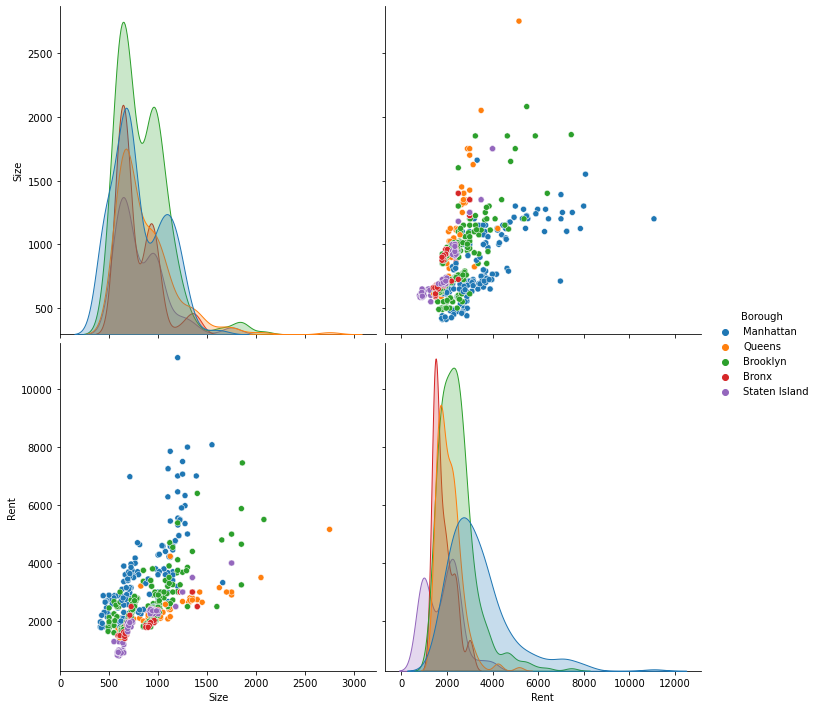

In [4]:
# Show visually representing the data
sns.pairplot(df, hue='Borough', height=5)
plt.show()

In [5]:
# More visual representation of data
alt.Chart(df).mark_point().encode(x='Rent',y='Size',shape='Borough')

alt.Chart(...)

In [118]:
# Adjusting the data
# Convert String Classification To Ensure Model Will Understand Data
# First Convert Boroughs
df["Borough"] = df["Borough"].str.replace("Manhattan", "0")
df["Borough"] = df["Borough"].str.replace("Queens", "1")
df["Borough"] = df["Borough"].str.replace("Brooklyn", "2")
df["Borough"] = df["Borough"].str.replace("Bronx", "3")
df["Borough"] = df["Borough"].str.replace("Staten Island", "4")

# Next Convert Area
neighborhood = np.unique(df["Area"])
neighborhoods = {}
for i in range(len(neighborhood)):
    neighborhoods[neighborhood[i]] = str(i)
for i in neighborhoods:
    df["Area"] = df["Area"].replace(i, neighborhoods[i])

# Next Convert Bed
df["Bedrooms"] = df["Bedrooms"].str.replace("Studio", "0")
df["Bedrooms"] = df["Bedrooms"].str.replace("1 Bedroom", "1")
df["Bedrooms"] = df["Bedrooms"].str.replace("2 Bedroom", "2")
df["Bedrooms"] = df["Bedrooms"].str.replace("3 Bedroom", "3")
df["Bedrooms"] = df["Bedrooms"].str.replace("4 Bedroom", "4")
df["Bedrooms"] = df["Bedrooms"].str.replace("5 Bedroom", "5")
df["Bedrooms"] = df["Bedrooms"].str.replace("6 Bedroom", "6")

# Next Convert Bath
df["Bathrooms"] = df["Bathrooms"].str.replace("1 Bathroom", "1")
df["Bathrooms"] = df["Bathrooms"].str.replace("2 Bathroom", "2")
df["Bathrooms"] = df["Bathrooms"].str.replace("3 Bathroom", "3")
df["Bathrooms"] = df["Bathrooms"].str.replace("4 Bathroom", "4")
df["Bathrooms"] = df["Bathrooms"].str.replace("5 Bathroom", "5")
df["Bathrooms"] = df["Bathrooms"].str.replace("6 Bathroom", "6")

In [119]:
df

,Borough,Area,Bedrooms,Bathrooms,Size,Rent
0,0,41,0,1,555,2875
1,0,88,0,1,532,2595
2,0,137,0,1,500,2100
3,0,138,0,1,412,1795
4,0,139,0,1,490,2249
...,...,...,...,...,...,...
952,4,40,2,2,920,2250
953,4,50,2,2,950,2350
954,4,63,2,2,922,2400
955,4,59,2,2,944,2350


In [120]:
print("These are the neighborhoods that are usable for area.\nNote: Not all neighborhoods exist in the data you must use the ones below")
for i in neighborhoods:
    print(neighborhoods[i],":", i)

These are the neighborhoods that are usable for area.
Note: Not all neighborhoods exist in the data you must use the ones below
0 :  Brooklyn Heights
1 : Arden Heights
2 : Arlington
3 : Astoria
4 : Auburndale
5 : Bath Beach
6 : Battery Park City
7 : Bay Ridge
8 : Bayside
9 : Bedford Park
10 : Bedford-Stuyvesant
11 : Belmont
12 : Bensonhurst
13 : Bloomfield
14 : Boerum Hill
15 : Borough Park
16 : Briarwood
17 : Brighton Beach
18 : Bronx
19 : Bronxwood
20 : Brooklyn
21 : Brooklyn Heights
22 : Brownsville
23 : Bushwick
24 : Canarsie
25 : Carroll Gardens
26 : Central Harlem
27 : Central Park South
28 : Central Queens
29 : Chelsea
30 : Chinatown
31 : Clinton Hill
32 : Cobble Hill
33 : Columbia St Waterfront District
34 : Concourse
35 : Coney Island
36 : Corona
37 : Crown Heights
38 : DUMBO
39 : Ditmas Park
40 : Dongan Hills
41 : Downtown
42 : Downtown Brooklyn
43 : Dyker Heights
44 : East Brooklyn
45 : East Elmhurst
46 : East Flatbush
47 : East Harlem
48 : East New York
49 : East Village
50

In [121]:
# Use Cross validation test
x_train, x_test, y_train, y_test = train_test_split(np.array(df[["Borough", "Area", "Bedrooms", "Bathrooms", "Size"]]), np.array(df['Rent']), test_size=0.1, train_size=.9)
test, train, predictions, error = [], [], [], []
actual_rent = []

In [122]:
def findFirstArea(boro, area, bed):
    for o, j, k, v, y, z in zip(df["Borough"], df["Area"], df["Bedrooms"], df["Bathrooms"], df["Size"], df["Rent"]):
        if (o == boro) & (j == area) & (k == bed):
            print(o, j, k, v, y, z)
            return z

# Gets the supposed to be prediction
actual_rent.append(findFirstArea('0', '26', '3'))
actual_rent.append(findFirstArea('1', '36', '2'))
actual_rent.append(findFirstArea('2', '21', '1'))
actual_rent.append(findFirstArea('3', '11', '1'))
actual_rent.append(findFirstArea('4', '1', '0'))
print(actual_rent)

0 26 3 2 1150 3700
1 36 2 2 945 2342
2 21 1 1 734 2300
3 11 1 1 664 1575
4 1 0 1 600 1290
[3700, 2342, 2300, 1575, 1290]


In [123]:
# Prints out the accuracy and test the models predictions
def model_test(algo, *data):
    # Scoring the model
    model = algo.fit(data[0], data[1])
    data[4].append(model.score(data[0], data[1]))
    print("Test Accuracy:", data[4][len(data[4])-1])
    data[5].append(model.score(data[2], data[3]))
    print("Train Accuracy:", data[5][len(data[5])-1], "\n")

    # Predicting Manhattan Rent
    data[6].append(model.predict([[0, 26, 3, 2, 1150]]))
    print("Predicted Rent:", data[6][len(data[6])-1])
    print("Actual Rent:", data[7][0])
    print("Error:", abs(data[7][0] - data[6][len(data[6])-1]), "\n")

    # Predicting Queens Rent
    data[6].append(model.predict([[1, 36, 2, 2, 945]]))
    print("Predicted Rent:", data[6][len(data[6])-1])
    print("Actual Rent:", data[7][1])
    print("Error:", abs(data[7][1] - data[6][len(data[6])-1]), "\n")

    # Predicting Brooklyn rent
    data[6].append(model.predict([[2, 21, 1, 1, 734]]))
    print("Predicted Rent:", data[6][len(data[6])-1])
    print("Actual Rent:", data[7][2])
    print("Error:", abs(data[7][2] - data[6][len(data[6])-1]), "\n")

    # Predicting Bronx Rent
    data[6].append(model.predict([[3, 11, 1, 1, 664]]))
    print("Predicted Rent:", data[6][len(data[6])-1])
    print("Actual Rent:", data[7][3])
    print("Error:", abs(data[7][3] - data[6][len(data[6])-1]), "\n")

    # Predicting Staten Island Rent
    data[6].append(model.predict([[4, 1, 0, 1, 600]]))
    print("Predicted Rent:", data[6][len(data[6])-1])
    print("Actual Rent:", data[7][4])
    print("Error:", abs(data[7][4] - data[6][len(data[6])-1]), "\n")

In [124]:
print("Linear Regression Model")
model_test(ln.LinearRegression(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Linear Regression Model
Test Accuracy: 0.5604803037920996
Train Accuracy: 0.47686147221008146 

Predicted Rent: [3821.86227735]
Actual Rent: 3700
Error: [121.86227735] 

Predicted Rent: [3059.94682788]
Actual Rent: 2342
Error: [717.94682788] 

Predicted Rent: [2105.60784685]
Actual Rent: 2300
Error: [194.39215315] 

Predicted Rent: [1579.53177873]
Actual Rent: 1575
Error: [4.53177873] 

Predicted Rent: [1173.6120638]
Actual Rent: 1290
Error: [116.3879362] 



In [125]:
print("Ridge Regression Model")
model_test(ln.Ridge(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Ridge Regression Model
Test Accuracy: 0.560479903035584
Train Accuracy: 0.4767511619405178 

Predicted Rent: [3821.40295423]
Actual Rent: 3700
Error: [121.40295423] 

Predicted Rent: [3059.21286593]
Actual Rent: 2342
Error: [717.21286593] 

Predicted Rent: [2105.9263948]
Actual Rent: 2300
Error: [194.0736052] 

Predicted Rent: [1580.08604306]
Actual Rent: 1575
Error: [5.08604306] 

Predicted Rent: [1173.83097204]
Actual Rent: 1290
Error: [116.16902796] 



In [126]:
print("Lasso Model")
model_test(ln.Lasso(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Lasso Model
Test Accuracy: 0.560469871627381
Train Accuracy: 0.47640543592094764 

Predicted Rent: [3821.89632548]
Actual Rent: 3700
Error: [121.89632548] 

Predicted Rent: [3057.41609075]
Actual Rent: 2342
Error: [715.41609075] 

Predicted Rent: [2107.31672294]
Actual Rent: 2300
Error: [192.68327706] 

Predicted Rent: [1582.16029729]
Actual Rent: 1575
Error: [7.16029729] 

Predicted Rent: [1172.8063616]
Actual Rent: 1290
Error: [117.1936384] 



In [127]:
print("ElasticNet Model")
model_test(ln.ElasticNet(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

ElasticNet Model
Test Accuracy: 0.5467677845447658
Train Accuracy: 0.44421359422560525 

Predicted Rent: [3663.48342418]
Actual Rent: 3700
Error: [36.51657582] 

Predicted Rent: [2932.25328265]
Actual Rent: 2342
Error: [590.25328265] 

Predicted Rent: [2132.93199903]
Actual Rent: 2300
Error: [167.06800097] 

Predicted Rent: [1688.87104701]
Actual Rent: 1575
Error: [113.87104701] 

Predicted Rent: [1291.35785246]
Actual Rent: 1290
Error: [1.35785246] 



In [128]:
print("Lars Model")
model_test(ln.Lars(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Lars Model
Test Accuracy: 0.5604803037920996
Train Accuracy: 0.4768614722100817 

Predicted Rent: [3821.86227735]
Actual Rent: 3700
Error: [121.86227735] 

Predicted Rent: [3059.94682788]
Actual Rent: 2342
Error: [717.94682788] 

Predicted Rent: [2105.60784685]
Actual Rent: 2300
Error: [194.39215315] 

Predicted Rent: [1579.53177873]
Actual Rent: 1575
Error: [4.53177873] 

Predicted Rent: [1173.6120638]
Actual Rent: 1290
Error: [116.3879362] 



In [129]:
print("Bayesian Ridge Model")
model_test(ln.BayesianRidge(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Bayesian Ridge Model
Test Accuracy: 0.5604005878054652
Train Accuracy: 0.47522391896786487 

Predicted Rent: [3814.96180072]
Actual Rent: 3700
Error: [114.96180072] 

Predicted Rent: [3049.58502829]
Actual Rent: 2342
Error: [707.58502829] 

Predicted Rent: [2109.95911006]
Actual Rent: 2300
Error: [190.04088994] 

Predicted Rent: [1587.47963857]
Actual Rent: 1575
Error: [12.47963857] 

Predicted Rent: [1177.13198391]
Actual Rent: 1290
Error: [112.86801609] 



In [130]:
print("Tweedie Regression Model")
model_test(ln.TweedieRegressor(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Tweedie Regression Model
Test Accuracy: 0.5294141357077766
Train Accuracy: 0.42192854540888536 

Predicted Rent: [3559.76269947]
Actual Rent: 3700
Error: [140.23730053] 

Predicted Rent: [2875.99749462]
Actual Rent: 2342
Error: [533.99749462] 

Predicted Rent: [2132.52052912]
Actual Rent: 2300
Error: [167.47947088] 

Predicted Rent: [1737.85007036]
Actual Rent: 1575
Error: [162.85007036] 

Predicted Rent: [1377.01828578]
Actual Rent: 1290
Error: [87.01828578] 



In [131]:
print("Kernel Ridge Model")
model_test(KernelRidge(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Kernel Ridge Model
Test Accuracy: 0.5310989580688787
Train Accuracy: 0.48426134001072296 

Predicted Rent: [3643.7793417]
Actual Rent: 3700
Error: [56.2206583] 

Predicted Rent: [2964.21553707]
Actual Rent: 2342
Error: [622.21553707] 

Predicted Rent: [1928.12038708]
Actual Rent: 2300
Error: [371.87961292] 

Predicted Rent: [1372.97548485]
Actual Rent: 1575
Error: [202.02451515] 

Predicted Rent: [1143.95138073]
Actual Rent: 1290
Error: [146.04861927] 



In [132]:
print("KNeighbors Model")
model_test(KNeighborsRegressor(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

KNeighbors Model
Test Accuracy: 0.664226771778402
Train Accuracy: 0.525531346386394 

Predicted Rent: [4164.]
Actual Rent: 3700
Error: [464.] 

Predicted Rent: [2906.8]
Actual Rent: 2342
Error: [564.8] 

Predicted Rent: [2177.6]
Actual Rent: 2300
Error: [122.4] 

Predicted Rent: [1592.8]
Actual Rent: 1575
Error: [17.8] 

Predicted Rent: [920.4]
Actual Rent: 1290
Error: [369.6] 



In [133]:
print("Gaussian Process Model")
model_test(GaussianProcessRegressor(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Gaussian Process Model
Test Accuracy: 0.9902424990971015
Train Accuracy: 0.43659323773335235 

Predicted Rent: [3699.99999963]
Actual Rent: 3700
Error: [3.69999725e-07] 

Predicted Rent: [2341.99999988]
Actual Rent: 2342
Error: [1.17076979e-07] 

Predicted Rent: [2299.99999989]
Actual Rent: 2300
Error: [1.14999693e-07] 

Predicted Rent: [1574.99999992]
Actual Rent: 1575
Error: [7.87470071e-08] 

Predicted Rent: [1023.]
Actual Rent: 1290
Error: [267.] 



In [134]:
print("Partial Least Squares Model")
model_test(PLSRegression(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Partial Least Squares Model
Test Accuracy: 0.5311398180845399
Train Accuracy: 0.44480141532846074 

Predicted Rent: [[3888.99779634]]
Actual Rent: 3700
Error: [[188.99779634]] 

Predicted Rent: [[3130.02012909]]
Actual Rent: 2342
Error: [[788.02012909]] 

Predicted Rent: [[2032.57715843]]
Actual Rent: 2300
Error: [[267.42284157]] 

Predicted Rent: [[1577.62497788]]
Actual Rent: 1575
Error: [[2.62497788]] 

Predicted Rent: [[967.19628716]]
Actual Rent: 1290
Error: [[322.80371284]] 



In [135]:
print("Decision Tree Model")
model_test(DecisionTreeRegressor(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Decision Tree Model
Test Accuracy: 0.9902424990971063
Train Accuracy: 0.8438447990747787 

Predicted Rent: [3700.]
Actual Rent: 3700
Error: [0.] 

Predicted Rent: [2342.]
Actual Rent: 2342
Error: [0.] 

Predicted Rent: [2300.]
Actual Rent: 2300
Error: [0.] 

Predicted Rent: [1575.]
Actual Rent: 1575
Error: [0.] 

Predicted Rent: [1023.]
Actual Rent: 1290
Error: [267.] 



In [136]:
print("Random Forest Model")
model_test(RandomForestRegressor(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Random Forest Model
Test Accuracy: 0.9699904961527697
Train Accuracy: 0.7989119532773641 

Predicted Rent: [3933.94]
Actual Rent: 3700
Error: [233.94] 

Predicted Rent: [2348.42]
Actual Rent: 2342
Error: [6.42] 

Predicted Rent: [2323.28]
Actual Rent: 2300
Error: [23.28] 

Predicted Rent: [1562.11]
Actual Rent: 1575
Error: [12.89] 

Predicted Rent: [1024.8779183]
Actual Rent: 1290
Error: [265.1220817] 



In [137]:
print("AdaBoost Model")
model_test(AdaBoostRegressor(loss="linear"), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

AdaBoost Model
Test Accuracy: 0.7432569740072568
Train Accuracy: 0.6649684178048105 

Predicted Rent: [5059.67362924]
Actual Rent: 3700
Error: [1359.67362924] 

Predicted Rent: [2550.02702703]
Actual Rent: 2342
Error: [208.02702703] 

Predicted Rent: [2395.44186047]
Actual Rent: 2300
Error: [95.44186047] 

Predicted Rent: [1664.176]
Actual Rent: 1575
Error: [89.176] 

Predicted Rent: [1664.176]
Actual Rent: 1290
Error: [374.176] 



In [138]:
print("Gradient Boost Model")
model_test(GradientBoostingRegressor(), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

Gradient Boost Model
Test Accuracy: 0.914980123979908
Train Accuracy: 0.7769470593827921 

Predicted Rent: [4199.56892739]
Actual Rent: 3700
Error: [499.56892739] 

Predicted Rent: [2394.73157764]
Actual Rent: 2342
Error: [52.73157764] 

Predicted Rent: [2452.76545638]
Actual Rent: 2300
Error: [152.76545638] 

Predicted Rent: [1510.3908281]
Actual Rent: 1575
Error: [64.6091719] 

Predicted Rent: [1015.9678469]
Actual Rent: 1290
Error: [274.0321531] 



In [139]:
print("MultiLayer Perceptron Model")
model_test(MLPRegressor(activation="relu", solver="lbfgs", learning_rate_init=0.0001, learning_rate="adaptive" ,hidden_layer_sizes=2000, max_iter=3000), x_train, y_train, x_test, y_test, test, train, predictions, actual_rent)

MultiLayer Perceptron Model
Test Accuracy: 0.5977656509843825
Train Accuracy: 0.5135901614721379 

Predicted Rent: [3680.56519075]
Actual Rent: 3700
Error: [19.43480925] 

Predicted Rent: [2989.13505487]
Actual Rent: 2342
Error: [647.13505487] 

Predicted Rent: [2040.84426855]
Actual Rent: 2300
Error: [259.15573145] 

Predicted Rent: [1517.3715393]
Actual Rent: 1575
Error: [57.6284607] 

Predicted Rent: [1232.1058997]
Actual Rent: 1290
Error: [57.8941003] 



In [140]:
p, e = [], []
for i in range(len(predictions)):
    if isinstance(predictions[i][0], np.ndarray):
        p.append(predictions[i][0][0])
        e.append(abs(predictions[i][0][0] - actual_rent[i%4]))
    else:
        p.append(predictions[i][0])
        e.append(abs(predictions[i][0] - actual_rent[i%4]))

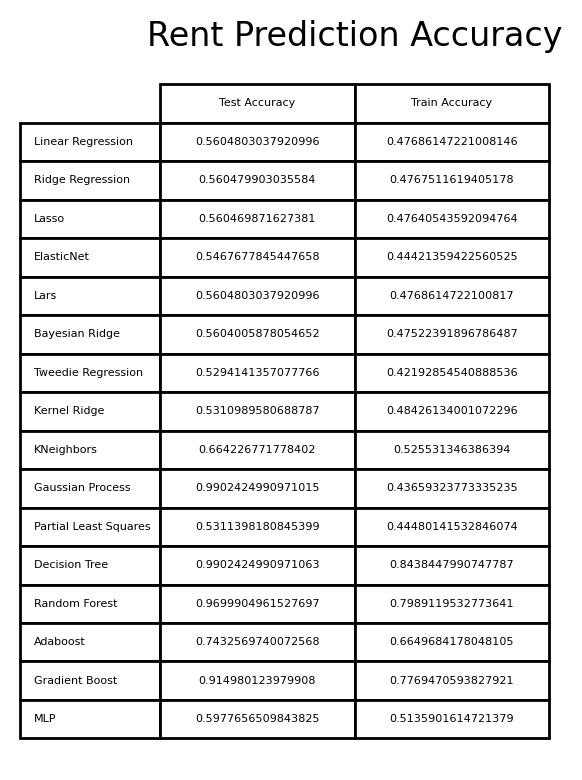

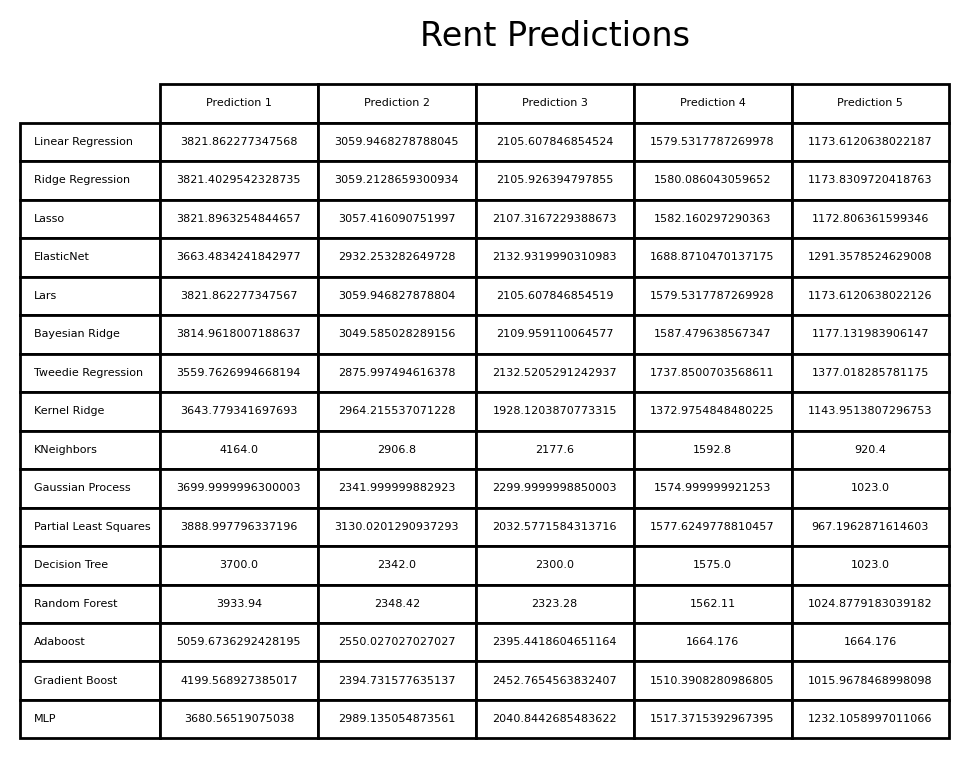

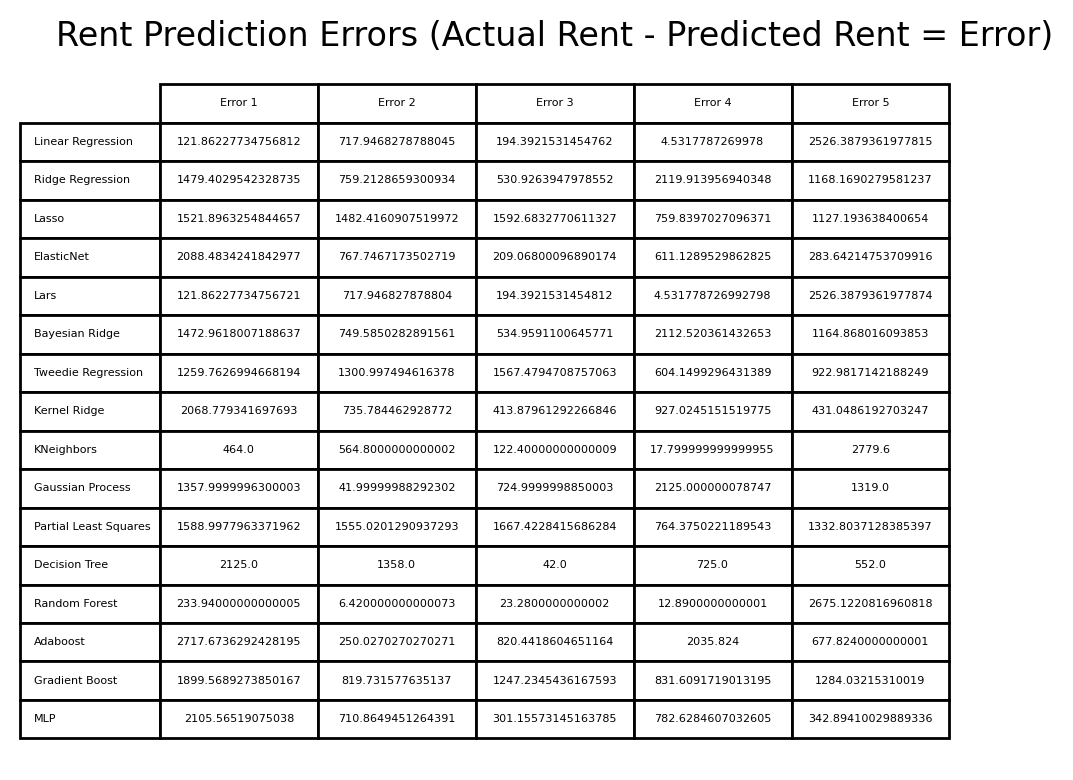

In [142]:
models = ["Linear Regression", "Ridge Regression", "Lasso", "ElasticNet", "Lars",
          "Bayesian Ridge", "Tweedie Regression", "Kernel Ridge", "KNeighbors",
          "Gaussian Process", "Partial Least Squares", "Decision Tree",
          "Random Forest", "Adaboost", "Gradient Boost", "MLP"]

# Table for the Prediction Accuracy
fig, ax = plt.subplots(dpi=200, figsize = (4, 4))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Rent Prediction Accuracy")
df = pd.DataFrame({"Test Accuracy": test, "Train Accuracy": train})
ax.table(cellText=df.values, rowLabels=models, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

# Table for Predictions
fig, ax = plt.subplots(dpi=200, figsize = (6, 4))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Rent Predictions")
df = pd.DataFrame({"Prediction 1": p[0:80:5], "Prediction 2": p[1:80:5], "Prediction 3": p[2:80:5], "Prediction 4": p[3:80:5], "Prediction 5": p[4:80:5]})
ax.table(cellText=df.values, rowLabels=models, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()

# Table for the Actual Rent - Predicted Rent = Errors
fig, ax = plt.subplots(dpi=200, figsize = (6, 4))
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.set_title("Rent Prediction Errors (Actual Rent - Predicted Rent = Error)")
df = pd.DataFrame({"Error 1": e[0:80:5], "Error 2": e[1:80:5], "Error 3": e[2:80:5], "Error 4": e[3:80:5], "Error 5": e[4:80:5]})
ax.table(cellText=df.values, rowLabels=models, colLabels=df.columns, cellLoc='center', loc='center')
fig.tight_layout()
plt.show()